In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (1).csv


In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.rename(columns = {'gender' : 'Gender', 'tenure' : 'Tenure'}, inplace = True)
df.head(10)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.drop('customerID', axis = 1, inplace = True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<Axes: xlabel='Churn', ylabel='count'>

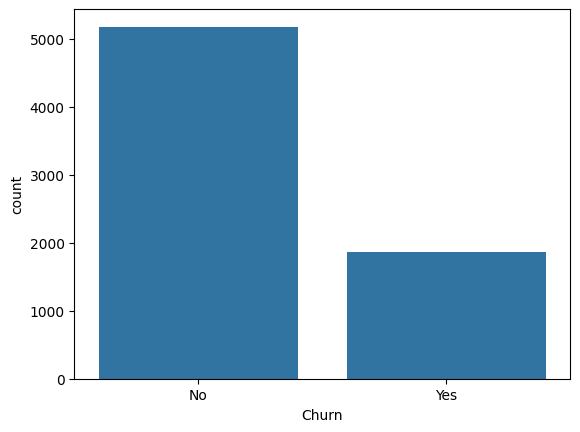

In [ ]:
sns.countplot(data = df, x = 'Churn')

In [ ]:
df['Churn2'] = df['Churn'].map({'Yes' : 1, 'No' : 0})
churn_rate = int(round(df['Churn2'].sum()/len(df) * 100,0))
#churn_rate = df['Churn'].value_counts(normalize = True)
print(f'{churn_rate:.0%}')

2700%


In [ ]:
df_churn = df.groupby('Gender').agg(Count = ('Gender', 'count'), Churned = ('Churn2', 'sum')).reset_index()
df_churn['Churn_rate'] = round(df_churn['Churned']/df_churn['Count'] * 100, 1)
df_churn

,Gender,Count,Churned,Churn_rate
0,Female,3488,939,26.9
1,Male,3555,930,26.2


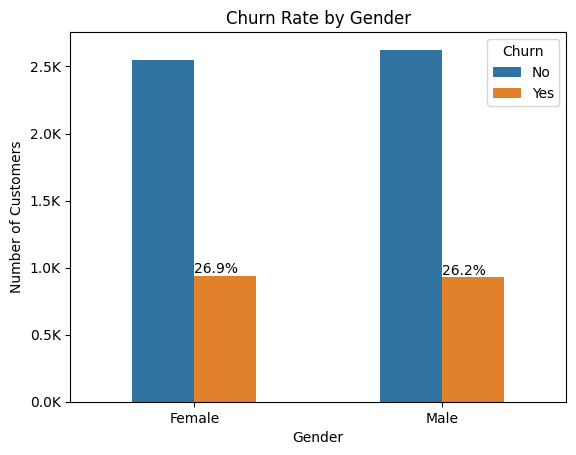

In [ ]:
sns.countplot(data = df, x = 'Gender', hue = 'Churn', width = 0.5)
plt.title('Churn Rate by Gender')
plt.ylabel('Number of Customers')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{y/1000}K"))
for i in df_churn.index:
  plt.text(i, df_churn['Churned'].iloc[i] + 20, f"{df_churn['Churn_rate'].iloc[i]:.1f}%")
plt.show()

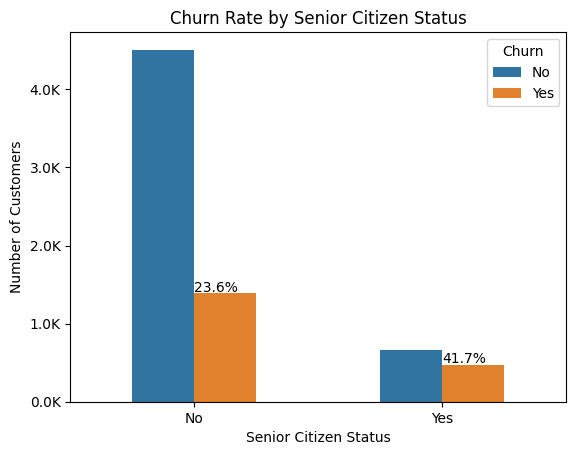

In [ ]:
df['SeniorCitizenStatus'] = df['SeniorCitizen'].map({ 1: 'Yes', 0: 'No'})
df_churn = df.groupby('SeniorCitizenStatus').agg(Count = ('SeniorCitizenStatus', 'count'), Churned = ('Churn2', 'sum')).reset_index()
df_churn['Churn_rate'] = round(df_churn['Churned']/df_churn['Count'] * 100, 1)
sns.countplot(data = df, x = 'SeniorCitizenStatus', hue = 'Churn', width = 0.5)
plt.title('Churn Rate by Senior Citizen Status')
plt.ylabel('Number of Customers')
plt.xlabel('Senior Citizen Status')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{y/1000}K"))
for i in df_churn.index:
  plt.text(i, df_churn['Churned'].iloc[i] + 20, f"{df_churn['Churn_rate'].iloc[i]:.1f}%")
plt.show()

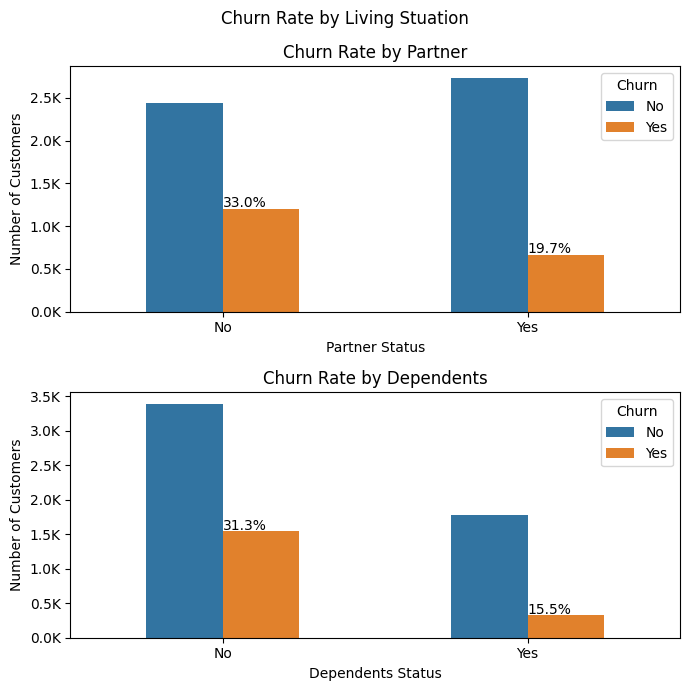

In [ ]:
living_situation = ['Partner', 'Dependents']
df_living_situation = []
for i, df_situation in enumerate(living_situation):
  df_churn = df.groupby(df_situation).agg(Count = (df_situation, 'count'), Churned = ('Churn2', 'sum')).reset_index()
  df_churn['Churn_rate'] = round(df_churn['Churned']/df_churn['Count'] * 100, 1)
  df_living_situation.append(df_churn)
fig, ax = plt.subplots(2,1, figsize = (7,7))
for i, situation in enumerate(living_situation):
  sns.countplot(data = df, x = living_situation[i], hue = 'Churn', width = 0.5, order = ['No', 'Yes'], ax = ax[i])
  ax[i].set_title(f'Churn Rate by {living_situation[i]}')
  ax[i].set_ylabel('Number of Customers')
  ax[i].set_xlabel(f'{living_situation[i]} Status')
  ax[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{y/1000}K"))
  for j in df_living_situation[i].index:
    ax[i].text(j, df_living_situation[i]['Churned'].iloc[j] + 20, f"{df_living_situation[i]['Churn_rate'].iloc[j]:.1f}%")
fig.suptitle('Churn Rate by Living Stuation')
plt.tight_layout()
plt.show()

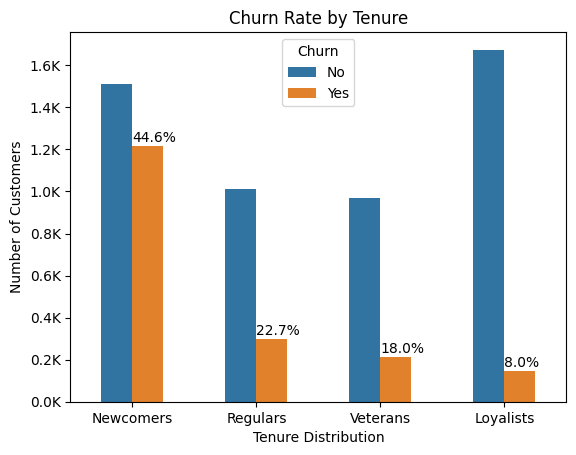

In [ ]:
bins = [0, 18, 36, 54, 72]
labels = ['Newcomers', 'Regulars', 'Veterans', 'Loyalists']
df['TenureDistribution'] = pd.cut(df['Tenure'], bins = bins, labels = labels, right = True)
df_churn = df.groupby('TenureDistribution', observed = True).agg(Count = ('TenureDistribution', 'count'), Churned = ('Churn2', 'sum')).reset_index()
df_churn['Churn_rate'] = round(df_churn['Churned']/df_churn['Count'] * 100, 1)
sns.countplot(data = df, x = 'TenureDistribution', hue = 'Churn', width = 0.5)
plt.title('Churn Rate by Tenure')
plt.ylabel('Number of Customers')
plt.xlabel('Tenure Distribution')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{y/1000}K"))
for i in df_churn.index:
  plt.text(i, df_churn['Churned'].iloc[i] + 20, f"{df_churn['Churn_rate'].iloc[i]:.1f}%")
plt.show()

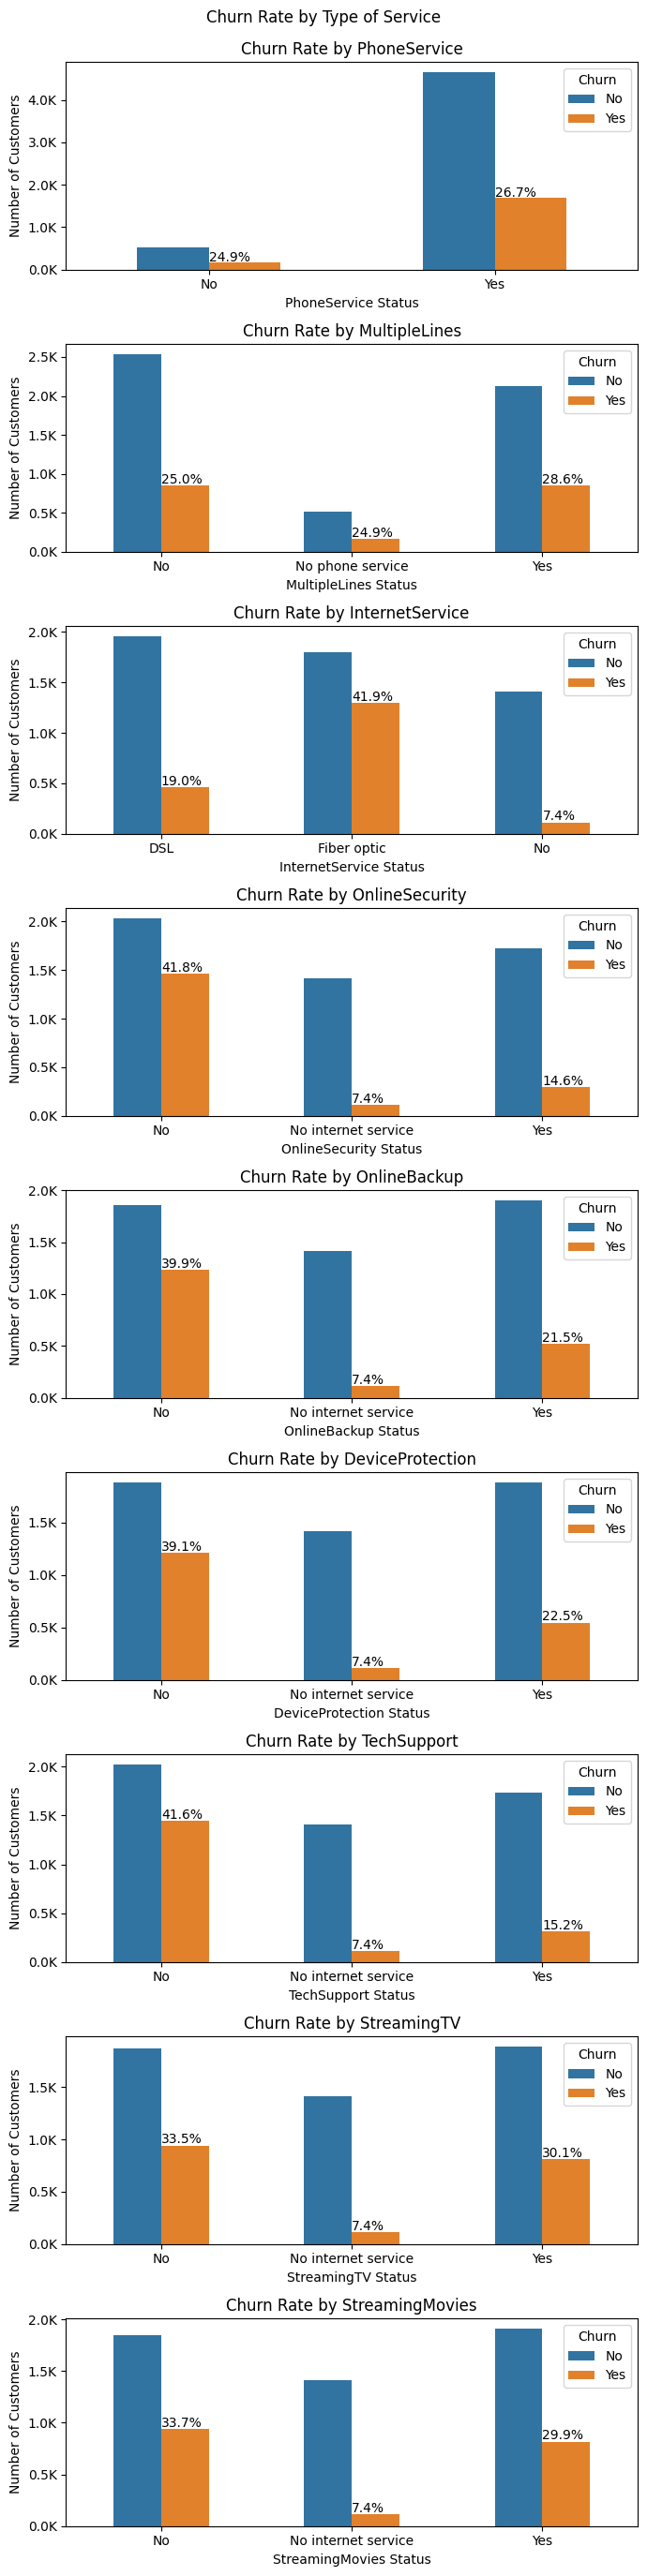

In [ ]:
service_type = df.columns[5:14].tolist()
df_services = []
for i, df_service in enumerate(service_type):
  df_churn = df.groupby(df_service).agg(Count = (df_service, 'count'), Churned = ('Churn2', 'sum')).reset_index()
  df_churn['Churn_rate'] = round(df_churn['Churned']/df_churn['Count'] * 100, 1)
  df_services.append(df_churn)
fig, ax = plt.subplots(9,1, figsize = (7,28))
for i, service in enumerate(service_type):
  sns.countplot(data = df, x = service_type[i], hue = 'Churn', width = 0.5, order = df_services[i].iloc[:,0].to_list(), ax = ax[i])
  ax[i].set_title(f'Churn Rate by {service_type[i]}')
  ax[i].set_ylabel('Number of Customers')
  ax[i].set_xlabel(f'{service_type[i]} Status')
  ax[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{y/1000}K"))
  for j in df_services[i].index:
    ax[i].text(j, df_services[i]['Churned'].iloc[j] + 20, f"{df_services[i]['Churn_rate'].iloc[j]:.1f}%")
fig.suptitle('Churn Rate by Type of Service')
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

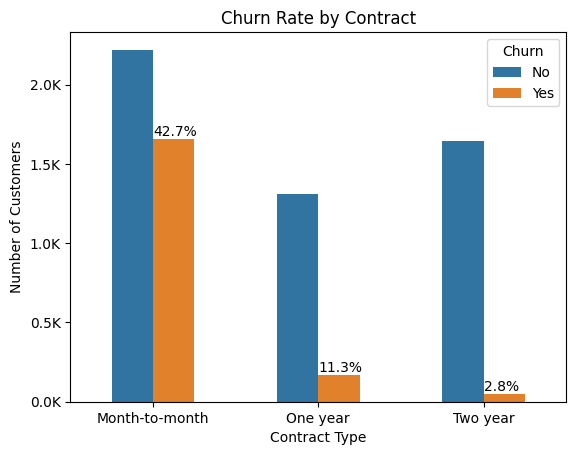

In [ ]:
df_churn = df.groupby('Contract').agg(Count = ('Contract', 'count'), Churned = ('Churn2', 'sum')).reset_index()
df_churn['Churn_rate'] = round(df_churn['Churned']/df_churn['Count'] * 100, 1)
sns.countplot(data = df, x = 'Contract', hue = 'Churn', width = 0.5)
plt.title('Churn Rate by Contract')
plt.ylabel('Number of Customers')
plt.xlabel('Contract Type')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{y/1000}K"))
for i in df_churn.index:
  plt.text(i, df_churn['Churned'].iloc[i] + 20, f"{df_churn['Churn_rate'].iloc[i]:.1f}%")
plt.show()

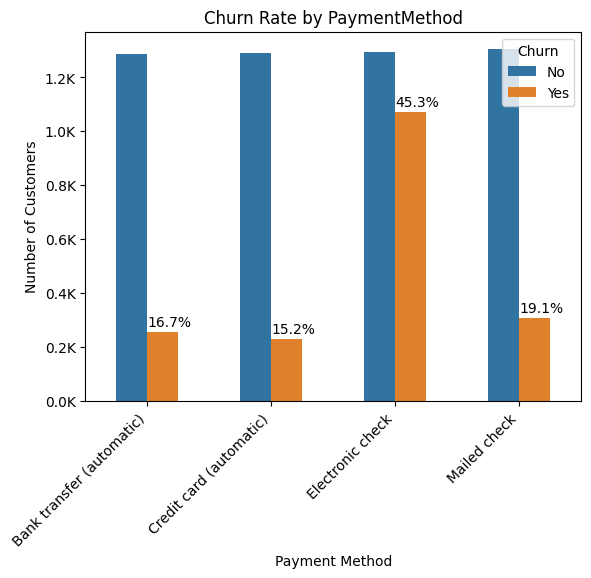

In [ ]:
df_churn = df.groupby('PaymentMethod').agg(Count = ('PaymentMethod', 'count'), Churned = ('Churn2', 'sum')).reset_index()
df_churn['Churn_rate'] = round(df_churn['Churned']/df_churn['Count'] * 100, 1)
sns.countplot(data = df, x = 'PaymentMethod', hue = 'Churn', width = 0.5, order = df_churn.iloc[:, 0].to_list())
plt.title('Churn Rate by PaymentMethod')
plt.ylabel('Number of Customers')
plt.xlabel('Payment Method')
plt.xticks(rotation = 45, ha = 'right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{y/1000}K"))
for i in df_churn.index:
  plt.text(i, df_churn['Churned'].iloc[i] + 20, f"{df_churn['Churn_rate'].iloc[i]:.1f}%")
plt.show()

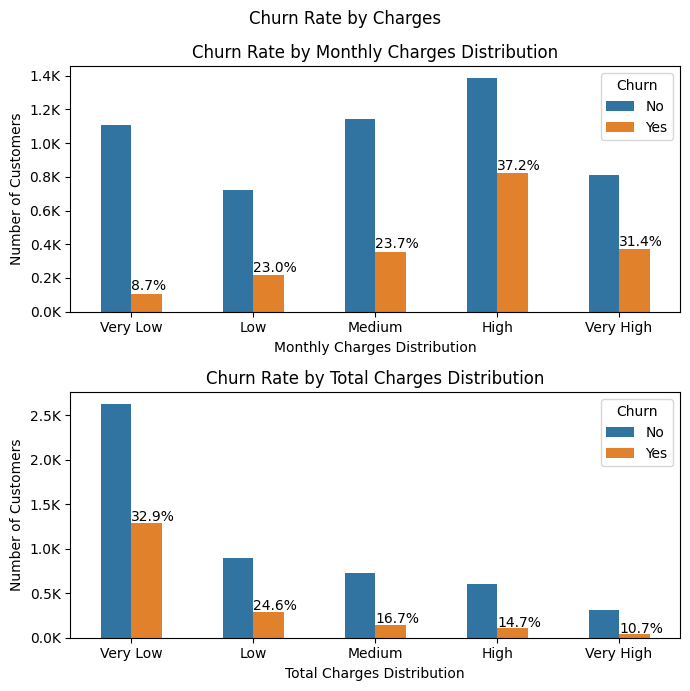

In [ ]:
labels1 = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
bins1 = [0, 24, 48, 72, 96, 120]
labels2 = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
bins2 = [0, 1737, 3474, 5211, 6948, 8685]
df['Monthly Charges Distribution'] = pd.cut(df['MonthlyCharges'], bins = bins1, labels = labels1, right = True)
df['Total Charges Distribution'] = pd.cut(df['TotalCharges'], bins = bins2, labels = labels2, right = True)
Charges = ['Monthly Charges Distribution', 'Total Charges Distribution']
df_charges = []
for i, df_charge in enumerate(Charges):
  df_churn = df.groupby(df_charge, observed = True).agg(Count = (df_charge, 'count'), Churned = ('Churn2', 'sum')).reset_index()
  df_churn['Churn_rate'] = round(df_churn['Churned']/df_churn['Count'] * 100, 1)
  df_charges.append(df_churn)
fig, ax = plt.subplots(2,1, figsize = (7,7))
for i, charge in enumerate(Charges):
  sns.countplot(data = df, x = Charges[i], hue = 'Churn', width = 0.5, order = df_charges[i].iloc[:, 0].to_list(), ax = ax[i])
  ax[i].set_title(f'Churn Rate by {Charges[i]}')
  ax[i].set_ylabel('Number of Customers')
  ax[i].set_xlabel(f'{Charges[i]}')
  ax[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{y/1000}K"))
  for j in df_charges[i].index:
    ax[i].text(j, df_charges[i]['Churned'].iloc[j] + 20, f"{df_charges[i]['Churn_rate'].iloc[j]:.1f}%")
fig.suptitle('Churn Rate by Charges')
plt.tight_layout()
plt.show()